In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [78]:
#Download data
zoetis = yf.download('ZTS', start='2015-01-01', end='2019-12-31', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [79]:
zoetis['Adj Close']

Date
2015-01-01     40.133110
2015-02-01     43.370304
2015-03-01     43.558525
2015-04-01     41.798859
2015-05-01     46.917206
2015-06-01     45.456059
2015-07-01     46.172493
2015-08-01     42.298073
2015-09-01     38.886288
2015-10-01     40.614353
2015-11-01     44.098824
2015-12-01     45.335930
2016-01-01     40.728535
2016-02-01     38.931107
2016-03-01     42.031551
2016-04-01     44.591564
2016-05-01     45.054874
2016-06-01     45.092884
2016-07-01     48.053261
2016-08-01     48.653091
2016-09-01     49.519527
2016-10-01     45.511116
2016-11-01     47.967587
2016-12-01     51.068241
2017-01-01     52.413383
2017-02-01     50.958889
2017-03-01     51.016251
2017-04-01     53.635399
2017-05-01     59.651096
2017-06-01     59.746864
2017-07-01     59.982784
2017-08-01     60.155487
2017-09-01     61.172466
2017-10-01     61.230022
2017-11-01     69.356285
2017-12-01     69.222626
2018-01-01     73.729225
2018-02-01     77.825424
2018-03-01     80.375977
2018-04-01     80.34

In [80]:
#Calculate log return
zoetis['Log_Returns'] = zoetis['Adj Close'].pct_change()
annualized_return = zoetis['Log_Returns'] .mean() * 12

In [81]:
annualized_return

0.2566078105048377

In [82]:
#Calculate volatility
annualized_volatility = zoetis['Log_Returns'].std() * np.sqrt(12)
annualized_volatility

0.18818667902594058

In [5]:
#Download esg data and handle missing value

import yesg
ESG = yesg.get_historic_esg('ZTS')
start_date = '2015-01-01'
end_date = '2019-12-31'
ESG_1 = pd.DataFrame(ESG)

In [6]:
ESG_1.fillna(method='ffill', inplace=True)

In [7]:
filtered_ESG_1 = ESG_1[(ESG_1.index >= start_date) & (ESG_1.index <= end_date)]

In [11]:
filtered_ESG_1

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2015-01-01,66.00,57.00,72.00,67.00
2015-02-01,66.00,57.00,72.00,67.00
2015-03-01,61.00,53.00,60.00,67.00
2015-04-01,61.00,53.00,60.00,67.00
2015-05-01,61.00,53.00,60.00,67.00
2015-06-01,61.00,53.00,60.00,67.00
2015-07-01,61.00,53.00,60.00,67.00
2015-08-01,61.00,53.00,60.00,67.00
2015-09-01,60.00,53.00,60.00,67.00


In [12]:
filtered_ESG_1_total_score = filtered_ESG_1 ['Total-Score']

Text(0.5, 1.0, 'Total ESG for Zoetis Inc.')

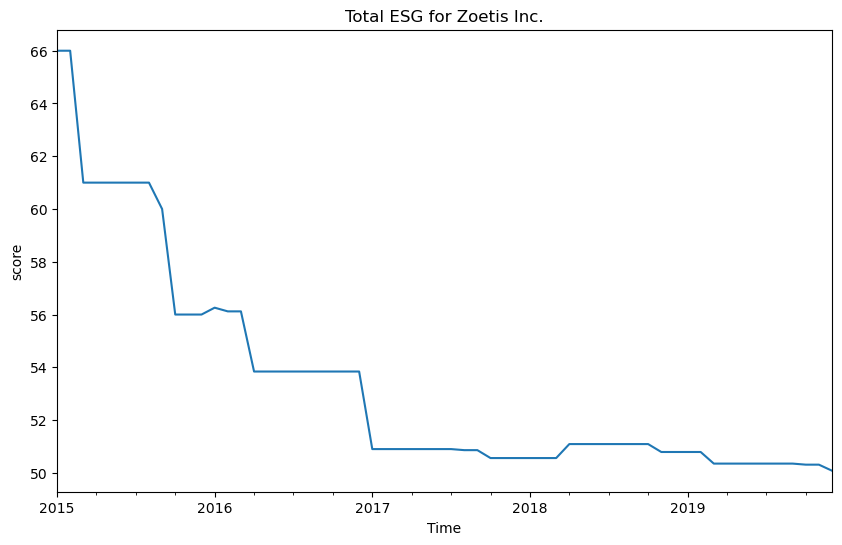

In [13]:
filtered_ESG_1_total_score.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('Total ESG for Zoetis Inc.')

In [88]:
#Calculate Correlation between Stock Price and ESG
merged_data = pd.merge(zoetis[['Adj Close']], filtered_ESG_1['Total-Score'], left_index=True, right_index=True)

In [89]:
correlation = merged_data['Adj Close'].corr(merged_data['Total-Score'])

In [90]:
print(f"The correlation between the price of Zoetis Inc. and Total score of ESG from January 2015, to December 2019. is {correlation:.4f}")

The correlation between the price of Zoetis Inc. and Total score of ESG from January 2015, to December 2019. is -0.6405


In [20]:
# Question 2

#getting data
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [21]:
#set time period
start = datetime(2022, 12, 1)
end = datetime(2022, 12, 31)

In [22]:
#Specifying the Location
location = Point(31.2304, 121.4737, 12)

In [23]:
data = Daily(location, start, end)
data = data.fetch()

In [31]:
# Calculating Heating Degree Days
T_base = 18
hdds = [max( T_base-temp , 0) for temp in data.tavg]
total_hdd = sum(hdds)

In [32]:
print (f'The Heating Degree Days for Shanghai in December 2022 is {total_hdd}')

The Heating Degree Days for Shanghai in December 2022 is 358.39999999999986
